In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data=pd.read_csv('Nascar_stats.csv')

In [2]:
#Checking for NA's
data.isna().sum()

Driver      0
Year        0
Races       0
Win         0
T5          0
T10         0
Pole        0
Laps        0
Led         0
Led_%       0
AvSt        0
AvFn        0
RAF         0
Miles       0
LLF         0
Points     66
Diff      190
Ppts      128
dtype: int64

In [2]:
#Fill all NA's with ZEROS
data.fillna(0,inplace=True)

In [4]:
#Verify 
data.isna().sum()

Driver    0
Year      0
Races     0
Win       0
T5        0
T10       0
Pole      0
Laps      0
Led       0
Led_%     0
AvSt      0
AvFn      0
RAF       0
Miles     0
LLF       0
Points    0
Diff      0
Ppts      0
dtype: int64

In [5]:
data.head()

,Driver,Year,Races,Win,T5,T10,Pole,Laps,Led,Led_%,AvSt,AvFn,RAF,Miles,LLF,Points,Diff,Ppts
0,Kyle Busch,2019,36,5,17,27,1,10167,1582,15.6,12.3,8.9,34.0,13564.44,31.0,5040.0,0.0,37.0
1,"Martin Truex, Jr.",2019,36,7,15,24,0,10152,1371,13.5,13.1,9.8,34.0,13527.80,26.0,5035.0,-5.0,44.0
2,Kevin Harvick,2019,36,4,15,26,6,9804,953,9.7,8.5,10.0,33.0,13125.97,30.0,5033.0,-7.0,26.0
3,Denny Hamlin,2019,36,6,19,24,3,10124,922,9.1,11.0,9.5,35.0,13456.43,30.0,5027.0,-13.0,36.0
4,Joey Logano,2019,36,2,12,21,2,10221,899,8.8,10.3,10.8,36.0,13739.73,29.0,2380.0,-2660.0,21.0


In [6]:
data.describe()

,Year,Races,Win,T5,T10,Pole,Laps,Led,Led_%,AvSt,AvFn,RAF,Miles,LLF,Points,Diff,Ppts
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,7.210000e+02,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,2014.334258,20.687933,0.499307,2.496533,4.993065,0.457698,5491.221914,145.628294,1.502080,1.872977e+06,25.897781,23.707628,2108.145354,5210.750721,245.604716,-29.950069,-1640.527046
std,2.865611,15.417828,1.299706,4.604684,7.605094,1.098585,4436.960256,352.208758,3.490289,2.709844e+06,10.307403,11.655049,4522.276186,5968.160668,803.994383,2306.126584,2036.245877
min,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,4.000000,0.000000,0.000000,0.000000,0.000000,-5039.000000,-6588.000000
25%,2012.000000,3.000000,0.000000,0.000000,0.000000,0.000000,560.000000,0.000000,0.000000,3.200000e+01,16.300000,14.800000,4.000000,24.000000,0.000000,0.000000,-2755.000000
50%,2014.000000,26.000000,0.000000,0.000000,0.000000,0.000000,5816.000000,3.000000,0.100000,2.220240e+05,26.200000,26.000000,32.000000,1422.500000,6.000000,14.000000,-89.000000
75%,2017.000000,36.000000,0.000000,3.000000,8.000000,0.000000,10027.000000,55.000000,0.700000,3.479474e+06,35.200000,33.000000,351.120000,12999.090000,27.000000,810.000000,0.000000
max,2019.000000,36.000000,8.000000,23.000000,29.000000,8.000000,10770.000000,2294.000000,22.500000,1.466316e+07,43.000000,43.000000,13803.770000,14521.800000,5040.000000,6622.000000,54.000000


In [7]:
win_grouped=data.groupby('Driver')['Win'].sum().sort_values(ascending=False)

In [8]:
win_grouped[win_grouped>=5]

Driver
Kyle Busch             40
Kevin Harvick          38
Jimmie Johnson         36
Brad Keselowski        29
Denny Hamlin           29
Martin Truex, Jr.      25
Joey Logano            22
Matt Kenseth           21
Tony Stewart           12
Carl Edwards           12
Jeff Gordon            11
Kurt Busch             11
Clint Bowyer            8
Dale Earnhardt, Jr.     8
Kasey Kahne             7
Chase Elliott           6
Kyle Larson             6
Ryan Newman             5
Greg Biffle             5
Name: Win, dtype: int64

In [9]:
lap_led_grouped=data.groupby('Driver')['Led'].sum().sort_values(ascending=False)

lap_led_grouped[lap_led_grouped>1000]

Driver
Kyle Busch             13031
Kevin Harvick          10893
Jimmie Johnson          9152
Martin Truex, Jr.       8045
Brad Keselowski         7391
Denny Hamlin            6651
Matt Kenseth            6076
Joey Logano             5960
Jeff Gordon             4198
Kurt Busch              4197
Carl Edwards            3537
Kyle Larson             3211
Clint Bowyer            2260
Tony Stewart            2169
Kasey Kahne             2004
Greg Biffle             1931
Chase Elliott           1844
Dale Earnhardt, Jr.     1707
Ryan Blaney             1414
Name: Led, dtype: int64

In [10]:
t5_grouped=data.groupby('Driver')['T5'].sum().sort_values(ascending=False)

t5_grouped[t5_grouped>=10]

Driver
Kevin Harvick           145
Kyle Busch              144
Brad Keselowski         114
Denny Hamlin            114
Joey Logano             113
Jimmie Johnson          110
Martin Truex, Jr.        89
Matt Kenseth             86
Kurt Busch               72
Carl Edwards             63
Jeff Gordon              62
Dale Earnhardt, Jr.      61
Clint Bowyer             60
Kyle Larson              55
Kasey Kahne              51
Ryan Newman              47
Chase Elliott            44
Tony Stewart             43
Greg Biffle              35
Jamie McMurray           33
Ryan Blaney              27
Erik Jones               24
Paul Menard              19
Aric Almirola            18
Ricky Stenhouse, Jr.     15
Mark Martin              14
Marcos Ambrose           13
Jeff Burton              12
Juan Pablo Montoya       12
Brian Vickers            11
Austin Dillon            11
Alex Bowman              10
A.J. Allmendinger        10
Name: T5, dtype: int64

In [3]:
data_to_scale=data[['T5','T10','Pole','Laps','Led','Led_%','AvSt','AvFn','RAF','LLF']]

col_names=data_to_scale.columns

In [4]:
#Target varible that I want to predict
target=data['Win']

In [5]:
#Instantiate Standard Scaler
scale=StandardScaler()


In [6]:
#Scales data and converts to a DataFrame
scale=scale.fit(data_to_scale)
features=scale.transform(data_to_scale)
features=pd.DataFrame(features)

features.columns=col_names

features.head()

,T5,T10,Pole,Laps,Led,Led_%,AvSt,AvFn,RAF,LLF
0,3.151907,2.895719,0.493980,1.054556,4.081014,4.041987,-0.691651,-1.650230,0.883696,-0.868500
1,2.717265,2.500972,-0.416914,1.051173,3.481522,3.439901,-0.691650,-1.562853,0.883696,-0.869338
2,2.717265,2.764137,5.048449,0.972687,2.293901,2.350410,-0.691652,-1.543436,0.797836,-0.868668
3,3.586549,2.500972,2.315768,1.044858,2.205824,2.178385,-0.691651,-1.591979,0.969555,-0.868668
4,2.065302,2.106226,1.404874,1.066735,2.140477,2.092373,-0.691651,-1.465768,1.055414,-0.868835


In [10]:
#Add Wins back into Dataframe to test for correlation
features['Win']=target
#Correlation Matrix
corr=features.corr()
#finds correlation of Wins against all of the other variables
corr['Win'].sort_values(ascending=False)


Win      1.000000
Led      0.864056
Led_%    0.858697
T5       0.845031
T10      0.747742
Pole     0.602338
AvSt     0.437228
Laps     0.392922
LLF      0.267554
RAF     -0.166994
AvFn    -0.511853
Name: Win, dtype: float64

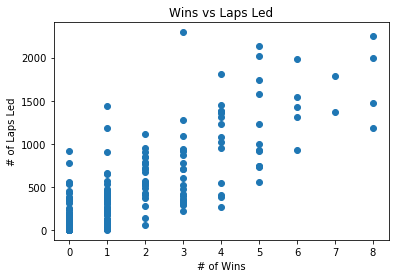

In [61]:
plt.scatter(data['Win'],data['Led'])
plt.xlabel('# of Wins')
plt.ylabel('# of Laps Led')
plt.title('Wins vs Laps Led')
plt.show()

In [11]:
#Drop Win to make it our target variable again
features=features.drop('Win',axis=1)

In [12]:
#Split into training and testing
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=.2,random_state=123)

lin_reg=LinearRegression()

lin_reg.fit(X_train,y_train)

lin_predict=lin_reg.predict(X_test)


In [13]:
#Cross validation score 
cross_val_score(lin_reg,X_train,y_train,cv=10).mean()

0.7531170364831727

In [14]:
#Prints out Mean Squared Error of the Linear Regression
lin_mse=mean_squared_error(y_test,lin_predict)

print('Root Mean Squared Error for Linear Regression:',np.sqrt(lin_mse))

Root Mean Squared Error for Linear Regression: 0.48680111553061123


In [15]:
#Sorts predicted Values by Actaul Wins
actual_predict=pd.DataFrame(list(zip(y_test,lin_predict)),columns=['Actual Wins','Predicted Wins'])

actual_predict.sort_values('Actual Wins',ascending=False)

,Actual Wins,Predicted Wins
127,5,2.780124
33,5,5.083619
128,3,2.629412
98,3,2.283516
105,3,3.065614
...,...,...
52,0,0.091722
49,0,0.328420
47,0,0.001464
46,0,0.314296


In [17]:
#Merges Driver names with their respective predicted Wins total and reorders the columns
lin_reg_df=actual_predict.merge(data['Driver'],left_index=True,right_index=True)

col=['Driver','Actual Wins','Predicted Wins']

lin_reg_df=lin_reg_df.reindex(columns=col)

lin_reg_df[lin_reg_df['Predicted Wins']>=1].sort_values('Predicted Wins',ascending=False)

,Driver,Actual Wins,Predicted Wins
33,Jamie McMurray,5,5.083619
4,Joey Logano,1,4.172326
39,Casey Mears,2,3.992449
27,Bubba Wallace,3,3.547873
105,Cody Ware,3,3.065614
127,Daniel Hemric,5,2.780124
80,Ryan Newman,3,2.681361
128,Jesse Little,3,2.629412
116,Timmy Hill,2,2.332997
98,Cole Whitt,3,2.283516


In [18]:
#Sets up parameter dictionary for Random Forest Grid Search
params={'n_estimators':[25,50,75,100],
       'max_depth':[2,3,4,5]}

rf=RandomForestRegressor()

nascar_search=RandomizedSearchCV(rf,param_distributions=params, cv=5,n_iter=16,scoring='neg_mean_squared_error',random_state=123)

In [19]:
#fits the random search
nascar_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [20]:
#best score
nascar_search.best_score_

-0.3984501437048582

In [21]:
#best estimator
nascar_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
#Best params
nascar_search.best_params_

{'n_estimators': 75, 'max_depth': 4}

In [23]:
#Predicts the Wins using the best estimator from random search grid
rf_predictions=nascar_search.best_estimator_.predict(X_test)

In [24]:
#Prints the mean squared error for random forsr
rf_mse=mean_squared_error(y_test,rf_predictions)

print('Root Mean Squared Error Random Forest:',np.sqrt(rf_mse))

Root Mean Squared Error Random Forest: 0.5130147576249884


In [25]:
#Prints cross vale score from random forest
cross_val_score(rf,X_train,y_train,cv=10).mean()

0.7469316174308525

In [32]:
#Attempt to predict finish position
#Counts the number of unique finish positions
np.unique(data['AvFn'])

array([ 4. ,  6.3,  6.9,  7.2,  7.4,  8. ,  8.1,  8.2,  8.3,  8.4,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.4,  9.5,  9.6,  9.8,  9.9, 10. , 10.1,
       10.2, 10.6, 10.7, 10.8, 10.9, 11.1, 11.3, 11.5, 11.6, 11.7, 11.8,
       11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9,
       13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15. , 15.1, 15.2, 15.3,
       15.4, 15.5, 15.6, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.4, 17.5, 17.7, 17.8,
       17.9, 18. , 18.1, 18.2, 18.3, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.4, 20.5, 20.6, 20.7, 20.8, 21. , 21.2, 21.3, 21.4, 21.6,
       21.7, 21.8, 22. , 22.1, 22.2, 22.3, 22.4, 22.5, 22.8, 22.9, 23. ,
       23.1, 23.2, 23.3, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2,
       24.3, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25

In [26]:
#Creates Average finish target
finish_target=data['AvFn']
#Rounds average fins=ish to singe digit
finish_target=round(finish_target)

#Drops AvFn from previously used features list
new_features=features.drop('AvFn',axis=1)

new_features.head()

,T5,T10,Pole,Laps,Led,Led_%,AvSt,RAF,LLF
0,3.151907,2.895719,0.493980,1.054556,4.081014,4.041987,-0.691651,0.883696,-0.868500
1,2.717265,2.500972,-0.416914,1.051173,3.481522,3.439901,-0.691650,0.883696,-0.869338
2,2.717265,2.764137,5.048449,0.972687,2.293901,2.350410,-0.691652,0.797836,-0.868668
3,3.586549,2.500972,2.315768,1.044858,2.205824,2.178385,-0.691651,0.969555,-0.868668
4,2.065302,2.106226,1.404874,1.066735,2.140477,2.092373,-0.691651,1.055414,-0.868835


In [27]:
finish_target.sort_values(ascending=True)

#Creates a range based on av finish position
finish_position=np.arange(4,44)

finish_position

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43])

In [28]:
from sklearn.preprocessing import LabelEncoder

#Transforms AvFn to categorical data in order to predict finish
label=LabelEncoder()

finish_cat=label.fit(finish_target)
finish_cat=label.transform(finish_target)

unique,counts=np.unique(finish_cat,return_counts=True)
#Create a data frame to see finish position correlates with categorical number and how many drivers fall into which category
avfn_df=pd.DataFrame(list(zip(finish_position,unique,counts)),columns=['Finish Position','Unique','Counts'])
#To make predictions easy to understand make Label encoding equal to finish position
finish_pos=avfn_df['Finish Position']



In [29]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

Finish_X_train,Finish_X_test,Finish_y_train,Finish_y_test=train_test_split(new_features,finish_cat,test_size=.2,random_state=42)

rfc_search=RandomizedSearchCV(rfc,params,cv=5,scoring='accuracy',random_state=42)

rfc_search.fit(Finish_X_train,Finish_y_train)

C:\Users\John\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [30]:
rfc_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rfc_search.best_score_

0.14403298350824587

In [32]:
#Predicts Finish Results based on classification. Looking at the accuracy results, it maybe better to use Regression instead
#of Classifier
finish_predict=rfc_search.best_estimator_.predict(Finish_X_test)

pd.DataFrame(list(zip(Finish_y_test,finish_predict)),columns=['Actual Finish','Predicted Finish'])

,Actual Finish,Predicted Finish
0,32,33
1,10,11
2,12,11
3,6,5
4,14,11
...,...,...
140,7,7
141,31,35
142,3,7
143,9,8


In [33]:
#Use Linear Regression to predict finish results

X_train_lin,X_test_lin,y_train_lin,y_test_lin=train_test_split(new_features,finish_target,test_size=.2,random_state=42)

lin_reg.fit(X_train_lin,y_train_lin)
lin_finish_predict=lin_reg.predict(X_test_lin)

finish_mse=mean_squared_error(y_test_lin,lin_finish_predict)

print('Root Mean Sqaured error for finish:',np.sqrt(finish_mse))


Root Mean Sqaured error for finish: 6.569542195668421


In [34]:
finish_df=pd.DataFrame(list(zip(y_test_lin,lin_finish_predict)),columns=['Actual Finish','Predicted Finish'])

finish_df

,Actual Finish,Predicted Finish
0,37.0,35.264881
1,15.0,17.984377
2,17.0,17.816869
3,11.0,12.233758
4,19.0,23.295077
...,...,...
140,12.0,14.962078
141,36.0,29.173878
142,8.0,5.083561
143,14.0,14.430787


In [35]:
cross_val_score(lin_reg,X_train_lin,y_train_lin,cv=5).mean()

0.6767221476075649

In [36]:
#Use Random Forest to Predict Average Finish

finish_search=RandomizedSearchCV(rf,params,cv=5,scoring='neg_mean_squared_error',random_state=123)

finish_search.fit(X_train_lin,y_train_lin)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [37]:
#Predict Average Finish and print out RMSE. Random Forest RMSE is is 13% better than Linear Regression
finish_prediction=finish_search.best_estimator_.predict(X_test_lin)

rf_finish_mse=mean_squared_error(y_test_lin,finish_prediction)

print('Random Forest Mean Squared Error:',np.sqrt(rf_finish_mse))

Random Forest Mean Squared Error: 5.6954604726007085


In [38]:
pd.DataFrame(list(zip(y_test_lin,finish_prediction)),columns=['Actual Finish','Predicted Finish'])

,Actual Finish,Predicted Finish
0,37.0,37.622538
1,15.0,15.901390
2,17.0,16.304961
3,11.0,10.746757
4,19.0,18.751136
...,...,...
140,12.0,14.085043
141,36.0,32.206066
142,8.0,12.768158
143,14.0,14.273009


In [43]:
#Predict race finish from Charlotte Motor Speedway

charlotte=pd.read_csv('Charlotte Motor Speedway.csv')

charlotte=charlotte.fillna(0)
charlotte.head()


,Driver,Races,Win,T5,T10,Pole,Laps,Led,Led_%,AvSt,AvFn,RAF,Miles,LLF,Points,Diff,Ppts
0,Kevin Harvick,6,1,4,6,0,1493,328,22.0,7.7,4.7,6,2323.35,6,258.0,0.0,6
1,Denny Hamlin,6,2,3,4,0,1493,91,6.1,13.7,8.3,6,2323.35,6,201.0,-57.0,11
2,Jimmie Johnson,6,0,1,3,0,1264,22,1.7,15.3,17.5,4,1982.19,4,161.0,-97.0,0
3,Kyle Larson,4,0,1,3,0,991,2,0.2,6.8,11.0,4,1637.00,3,121.0,-137.0,0
4,Erik Jones,6,0,1,3,0,1489,27,1.8,17.2,15.3,6,2317.85,4,146.0,-112.0,0


In [ ]:
#Preprocessing of data
charlotte_to_scale=charlotte[['T5','T10','Pole','Laps','Led','Led_%','AvSt','RAF','LLF']]
charlotte_target=charlotte['AvFn']

charlotte_columns=charlotte_to_scale.columns

charlotte_data=scale.fit(charlotte_to_scale)
charlotte_data=scale.transform(charlotte_to_scale)

charlotte_data=pd.DataFrame(charlotte_data,columns=charlotte_columns)

charlotte_data.head()


In [53]:
driver=charlotte['Driver']

In [52]:
#Use 2020 Nascar Data to predict finish for Charlotte Motor Speedway
charlotte_predict=finish_search.best_estimator_.predict(charlotte_data)

charlotte_mse=mean_squared_error(charlotte_target,charlotte_predict)

print('Root Mean Squared Error:',np.sqrt(charlotte_mse))

Root Mean Squared Error: 5.885802408133335


In [62]:
#Combine actual, predicted, and DraftKings Salary into one dataframe
charlotte_df=pd.DataFrame(list(zip(driver,charlotte_target,charlotte_predict)),columns=['Driver','Actual','Predicted'])


dk_salaries=pd.read_csv('DKSalaries-Nascar.csv')

charlotte_salaries=pd.merge(charlotte_df,dk_salaries,on='Driver')


charlotte_salaries.sort_values('Predicted',ascending=True)



,Driver,Actual,Predicted,Salary,AvgPointsPerGame
0,Kevin Harvick,4.7,11.422398,11200,63.56
8,Chase Elliott,16.0,11.571730,9700,42.03
7,Brad Keselowski,12.7,12.551171,10300,41.31
11,Clint Bowyer,14.2,12.795861,8300,35.56
12,Alex Bowman,12.0,12.972575,9400,40.06
9,Joey Logano,10.7,13.036406,10000,42.59
1,Denny Hamlin,8.3,14.256674,10800,47.59
5,Kyle Busch,13.7,15.342079,11500,30.59
3,Erik Jones,15.3,15.443930,8500,37.56
2,Jimmie Johnson,17.5,15.498959,9200,31.06
